In [3]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [4]:
# import unet module
from tf_unet import image_gen
from tf_unet import unet
from img_provider import data_provider
from tf_unet import util

In [5]:
generator_artificial = image_gen.GrayScaleDataProvider(572, 572, cnt=20)
generator_reallife = data_provider(x=572, y=572, batch_num=1, nclass=2, channel='red')

In [6]:
# test artificial generator
x_test, y_test = generator_artificial(1)
print(x_test.shape, y_test.shape)
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,:, :,0], aspect="auto")
ax[1].imshow(y_test[0,:, :,0], aspect="auto")

(1, 572, 572, 1) (1, 572, 572, 2)


In [7]:
net = unet.Unet(channels=generator_reallife.channels,
                n_class=generator_reallife.n_class,
                layers=3,
                features_root=16)

2019-01-10 09:44:56,124 Layers 3, features 16, filter size 3x3, pool size: 2x2


In [6]:
trainer = unet.Trainer(net, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))

In [7]:
# pre-training
path_artificial = trainer.train(generator_artificial, "./unet_trained", 
                     training_iters=32, epochs=10, display_step=2)

2019-01-10 09:26:23,754 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'


2019-01-10 09:26:23,754 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'


2019-01-10 09:26:23,770 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'


2019-01-10 09:26:23,770 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'


2019-01-10 09:26:32,046 Verification error= 83.6%, loss= 0.7067


2019-01-10 09:26:34,608 Start optimization


2019-01-10 09:26:40,020 Iter 0, Minibatch Loss= 0.6383, Training Accuracy= 0.8080, Minibatch error= 19.2%


2019-01-10 09:26:41,013 Iter 2, Minibatch Loss= 0.5354, Training Accuracy= 0.8856, Minibatch error= 11.4%


2019-01-10 09:26:41,986 Iter 4, Minibatch Loss= 0.5263, Training Accuracy= 0.8146, Minibatch error= 18.5%


2019-01-10 09:26:42,986 Iter 6, Minibatch Loss= 0.4315, Training Accuracy= 0.8623, Minibatch error= 13.8%


2019-01-10 09:26:43,985 Iter 8, Minibatch Loss= 0.4094, Training Accuracy= 0.8612, Minibatch error= 13.9%


2019-01-10 09:26:44,984 Iter 10, Minibatch Loss= 0.5044, Training Accuracy= 0.7926, Minibatch error= 20.7%


2019-01-10 09:26:45,985 Iter 12, Minibatch Loss= 0.4473, Training Accuracy= 0.8283, Minibatch error= 17.2%


2019-01-10 09:26:46,976 Iter 14, Minibatch Loss= 0.4195, Training Accuracy= 0.8386, Minibatch error= 16.1%


2019-01-10 09:26:48,071 Iter 16, Minibatch Loss= 0.4077, Training Accuracy= 0.8418, Minibatch error= 15.8%


2019-01-10 09:26:49,117 Iter 18, Minibatch Loss= 0.4658, Training Accuracy= 0.7907, Minibatch error= 20.9%


2019-01-10 09:26:50,102 Iter 20, Minibatch Loss= 0.3889, Training Accuracy= 0.8052, Minibatch error= 19.5%


2019-01-10 09:26:51,101 Iter 22, Minibatch Loss= 0.2658, Training Accuracy= 0.8684, Minibatch error= 13.2%


2019-01-10 09:26:52,132 Iter 24, Minibatch Loss= 0.2789, Training Accuracy= 0.8389, Minibatch error= 16.1%


2019-01-10 09:26:53,162 Iter 26, Minibatch Loss= 0.3668, Training Accuracy= 0.7702, Minibatch error= 23.0%


2019-01-10 09:26:54,164 Iter 28, Minibatch Loss= 0.2127, Training Accuracy= 0.8531, Minibatch error= 14.7%


2019-01-10 09:26:55,178 Iter 30, Minibatch Loss= 0.2715, Training Accuracy= 0.8384, Minibatch error= 16.2%


2019-01-10 09:26:55,537 Epoch 0, Average loss: 0.4332, learning rate: 0.2000


2019-01-10 09:26:56,168 Verification error= 16.4%, loss= 0.5136


2019-01-10 09:26:58,496 Iter 32, Minibatch Loss= 0.3380, Training Accuracy= 0.8262, Minibatch error= 17.4%


2019-01-10 09:26:59,511 Iter 34, Minibatch Loss= 0.2562, Training Accuracy= 0.8377, Minibatch error= 16.2%


2019-01-10 09:27:00,509 Iter 36, Minibatch Loss= 0.2016, Training Accuracy= 0.8473, Minibatch error= 15.3%


2019-01-10 09:27:01,570 Iter 38, Minibatch Loss= 0.2139, Training Accuracy= 0.8318, Minibatch error= 16.8%


2019-01-10 09:27:02,580 Iter 40, Minibatch Loss= 0.1674, Training Accuracy= 0.9586, Minibatch error= 4.1%


2019-01-10 09:27:03,657 Iter 42, Minibatch Loss= 0.3686, Training Accuracy= 0.9848, Minibatch error= 1.5%


2019-01-10 09:27:04,745 Iter 44, Minibatch Loss= 0.3383, Training Accuracy= 0.8000, Minibatch error= 20.0%


2019-01-10 09:27:05,905 Iter 46, Minibatch Loss= 0.2444, Training Accuracy= 0.8911, Minibatch error= 10.9%


2019-01-10 09:27:06,957 Iter 48, Minibatch Loss= 0.2209, Training Accuracy= 0.9498, Minibatch error= 5.0%


2019-01-10 09:27:08,008 Iter 50, Minibatch Loss= 0.2119, Training Accuracy= 0.9495, Minibatch error= 5.1%


2019-01-10 09:27:09,021 Iter 52, Minibatch Loss= 0.1055, Training Accuracy= 0.9891, Minibatch error= 1.1%


2019-01-10 09:27:10,040 Iter 54, Minibatch Loss= 0.1799, Training Accuracy= 0.9499, Minibatch error= 5.0%


2019-01-10 09:27:11,083 Iter 56, Minibatch Loss= 0.0691, Training Accuracy= 0.9878, Minibatch error= 1.2%


2019-01-10 09:27:12,121 Iter 58, Minibatch Loss= 0.0527, Training Accuracy= 0.9954, Minibatch error= 0.5%


2019-01-10 09:27:13,109 Iter 60, Minibatch Loss= 0.1642, Training Accuracy= 0.9626, Minibatch error= 3.7%


2019-01-10 09:27:14,123 Iter 62, Minibatch Loss= 0.6466, Training Accuracy= 0.8803, Minibatch error= 12.0%


2019-01-10 09:27:14,484 Epoch 1, Average loss: 0.2676, learning rate: 0.1900


2019-01-10 09:27:15,128 Verification error= 2.5%, loss= 0.0904


2019-01-10 09:27:17,544 Iter 64, Minibatch Loss= 0.0674, Training Accuracy= 0.9832, Minibatch error= 1.7%


2019-01-10 09:27:18,521 Iter 66, Minibatch Loss= 0.0345, Training Accuracy= 0.9928, Minibatch error= 0.7%


2019-01-10 09:27:19,533 Iter 68, Minibatch Loss= 2.4231, Training Accuracy= 0.8162, Minibatch error= 18.4%


2019-01-10 09:27:20,535 Iter 70, Minibatch Loss= 0.5748, Training Accuracy= 0.8507, Minibatch error= 14.9%


2019-01-10 09:27:21,527 Iter 72, Minibatch Loss= 0.5454, Training Accuracy= 0.8384, Minibatch error= 16.2%


2019-01-10 09:27:22,508 Iter 74, Minibatch Loss= 0.5174, Training Accuracy= 0.8325, Minibatch error= 16.8%


2019-01-10 09:27:23,502 Iter 76, Minibatch Loss= 0.4674, Training Accuracy= 0.8463, Minibatch error= 15.4%


2019-01-10 09:27:24,500 Iter 78, Minibatch Loss= 0.4046, Training Accuracy= 0.8498, Minibatch error= 15.0%


2019-01-10 09:27:25,500 Iter 80, Minibatch Loss= 0.3695, Training Accuracy= 0.8533, Minibatch error= 14.7%


2019-01-10 09:27:26,481 Iter 82, Minibatch Loss= 0.4441, Training Accuracy= 0.8094, Minibatch error= 19.1%


2019-01-10 09:27:27,440 Iter 84, Minibatch Loss= 0.3934, Training Accuracy= 0.8354, Minibatch error= 16.5%


2019-01-10 09:27:28,423 Iter 86, Minibatch Loss= 0.3708, Training Accuracy= 0.8395, Minibatch error= 16.0%


2019-01-10 09:27:29,417 Iter 88, Minibatch Loss= 0.3935, Training Accuracy= 0.8201, Minibatch error= 18.0%


2019-01-10 09:27:30,392 Iter 90, Minibatch Loss= 0.3862, Training Accuracy= 0.8206, Minibatch error= 17.9%


2019-01-10 09:27:31,344 Iter 92, Minibatch Loss= 0.3820, Training Accuracy= 0.8083, Minibatch error= 19.2%


2019-01-10 09:27:32,333 Iter 94, Minibatch Loss= 0.4023, Training Accuracy= 0.7971, Minibatch error= 20.3%


2019-01-10 09:27:32,691 Epoch 2, Average loss: 0.4843, learning rate: 0.1805


2019-01-10 09:27:33,334 Verification error= 16.4%, loss= 0.3358


2019-01-10 09:27:35,889 Iter 96, Minibatch Loss= 0.3402, Training Accuracy= 0.8353, Minibatch error= 16.5%


2019-01-10 09:27:36,870 Iter 98, Minibatch Loss= 0.2769, Training Accuracy= 0.8103, Minibatch error= 19.0%


2019-01-10 09:27:37,875 Iter 100, Minibatch Loss= 0.2649, Training Accuracy= 0.8253, Minibatch error= 17.5%


2019-01-10 09:27:38,865 Iter 102, Minibatch Loss= 0.2077, Training Accuracy= 0.8436, Minibatch error= 15.6%


2019-01-10 09:27:39,870 Iter 104, Minibatch Loss= 0.2769, Training Accuracy= 0.9280, Minibatch error= 7.2%


2019-01-10 09:27:40,858 Iter 106, Minibatch Loss= 0.1479, Training Accuracy= 0.9738, Minibatch error= 2.6%


2019-01-10 09:27:41,869 Iter 108, Minibatch Loss= 0.1734, Training Accuracy= 0.9669, Minibatch error= 3.3%


2019-01-10 09:27:42,863 Iter 110, Minibatch Loss= 0.0935, Training Accuracy= 0.9925, Minibatch error= 0.8%


2019-01-10 09:27:43,820 Iter 112, Minibatch Loss= 0.2093, Training Accuracy= 0.9561, Minibatch error= 4.4%


2019-01-10 09:27:44,809 Iter 114, Minibatch Loss= 0.1387, Training Accuracy= 0.9699, Minibatch error= 3.0%


2019-01-10 09:27:45,769 Iter 116, Minibatch Loss= 0.0560, Training Accuracy= 0.9942, Minibatch error= 0.6%


2019-01-10 09:27:46,805 Iter 118, Minibatch Loss= 0.0710, Training Accuracy= 0.9887, Minibatch error= 1.1%


2019-01-10 09:27:47,782 Iter 120, Minibatch Loss= 0.0363, Training Accuracy= 0.9926, Minibatch error= 0.7%


2019-01-10 09:27:48,789 Iter 122, Minibatch Loss= 0.0952, Training Accuracy= 0.9690, Minibatch error= 3.1%


2019-01-10 09:27:49,764 Iter 124, Minibatch Loss= 0.1115, Training Accuracy= 0.9792, Minibatch error= 2.1%


2019-01-10 09:27:50,755 Iter 126, Minibatch Loss= 0.0692, Training Accuracy= 0.9798, Minibatch error= 2.0%


2019-01-10 09:27:51,109 Epoch 3, Average loss: 0.2045, learning rate: 0.1715


2019-01-10 09:27:51,757 Verification error= 2.4%, loss= 0.0904


2019-01-10 09:27:54,200 Iter 128, Minibatch Loss= 0.0655, Training Accuracy= 0.9793, Minibatch error= 2.1%


2019-01-10 09:27:55,152 Iter 130, Minibatch Loss= 0.6851, Training Accuracy= 0.8951, Minibatch error= 10.5%


2019-01-10 09:27:56,143 Iter 132, Minibatch Loss= 0.0856, Training Accuracy= 0.9817, Minibatch error= 1.8%


2019-01-10 09:27:57,142 Iter 134, Minibatch Loss= 0.0935, Training Accuracy= 0.9741, Minibatch error= 2.6%


2019-01-10 09:27:58,156 Iter 136, Minibatch Loss= 0.0605, Training Accuracy= 0.9809, Minibatch error= 1.9%


2019-01-10 09:27:59,150 Iter 138, Minibatch Loss= 0.0797, Training Accuracy= 0.9820, Minibatch error= 1.8%


2019-01-10 09:28:00,146 Iter 140, Minibatch Loss= 0.1181, Training Accuracy= 0.9729, Minibatch error= 2.7%


2019-01-10 09:28:01,168 Iter 142, Minibatch Loss= 0.0292, Training Accuracy= 0.9906, Minibatch error= 0.9%


2019-01-10 09:28:02,131 Iter 144, Minibatch Loss= 0.0369, Training Accuracy= 0.9851, Minibatch error= 1.5%


2019-01-10 09:28:03,120 Iter 146, Minibatch Loss= 0.0948, Training Accuracy= 0.9716, Minibatch error= 2.8%


2019-01-10 09:28:04,120 Iter 148, Minibatch Loss= 0.1029, Training Accuracy= 0.9815, Minibatch error= 1.8%


2019-01-10 09:28:05,117 Iter 150, Minibatch Loss= 0.0489, Training Accuracy= 0.9884, Minibatch error= 1.2%


2019-01-10 09:28:06,141 Iter 152, Minibatch Loss= 0.0863, Training Accuracy= 0.9712, Minibatch error= 2.9%


2019-01-10 09:28:07,127 Iter 154, Minibatch Loss= 0.0175, Training Accuracy= 0.9941, Minibatch error= 0.6%


2019-01-10 09:28:08,111 Iter 156, Minibatch Loss= 0.0983, Training Accuracy= 0.9761, Minibatch error= 2.4%


2019-01-10 09:28:09,090 Iter 158, Minibatch Loss= 0.0252, Training Accuracy= 0.9922, Minibatch error= 0.8%


2019-01-10 09:28:09,453 Epoch 4, Average loss: 0.1117, learning rate: 0.1629


2019-01-10 09:28:10,103 Verification error= 2.1%, loss= 0.0780


2019-01-10 09:28:12,742 Iter 160, Minibatch Loss= 0.0648, Training Accuracy= 0.9816, Minibatch error= 1.8%


2019-01-10 09:28:13,712 Iter 162, Minibatch Loss= 0.0841, Training Accuracy= 0.9779, Minibatch error= 2.2%


2019-01-10 09:28:14,699 Iter 164, Minibatch Loss= 0.0964, Training Accuracy= 0.9679, Minibatch error= 3.2%


2019-01-10 09:28:15,705 Iter 166, Minibatch Loss= 0.1001, Training Accuracy= 0.9735, Minibatch error= 2.7%


2019-01-10 09:28:16,701 Iter 168, Minibatch Loss= 0.0116, Training Accuracy= 0.9977, Minibatch error= 0.2%


2019-01-10 09:28:17,690 Iter 170, Minibatch Loss= 0.0891, Training Accuracy= 0.9747, Minibatch error= 2.5%


2019-01-10 09:28:18,677 Iter 172, Minibatch Loss= 0.0349, Training Accuracy= 0.9898, Minibatch error= 1.0%


2019-01-10 09:28:19,679 Iter 174, Minibatch Loss= 0.0340, Training Accuracy= 0.9904, Minibatch error= 1.0%


2019-01-10 09:28:20,685 Iter 176, Minibatch Loss= 0.0231, Training Accuracy= 0.9933, Minibatch error= 0.7%


2019-01-10 09:28:21,698 Iter 178, Minibatch Loss= 0.1108, Training Accuracy= 0.9700, Minibatch error= 3.0%


2019-01-10 09:28:22,694 Iter 180, Minibatch Loss= 0.0471, Training Accuracy= 0.9877, Minibatch error= 1.2%


2019-01-10 09:28:23,715 Iter 182, Minibatch Loss= 0.0319, Training Accuracy= 0.9923, Minibatch error= 0.8%


2019-01-10 09:28:24,728 Iter 184, Minibatch Loss= 0.0203, Training Accuracy= 0.9951, Minibatch error= 0.5%


2019-01-10 09:28:25,757 Iter 186, Minibatch Loss= 0.1127, Training Accuracy= 0.9707, Minibatch error= 2.9%


2019-01-10 09:28:26,780 Iter 188, Minibatch Loss= 0.3847, Training Accuracy= 0.8188, Minibatch error= 18.1%


2019-01-10 09:28:27,741 Iter 190, Minibatch Loss= 0.2996, Training Accuracy= 0.8253, Minibatch error= 17.5%


2019-01-10 09:28:28,097 Epoch 5, Average loss: 0.1678, learning rate: 0.1548


2019-01-10 09:28:28,744 Verification error= 14.0%, loss= 0.2829


2019-01-10 09:28:31,805 Iter 192, Minibatch Loss= 0.2047, Training Accuracy= 0.8921, Minibatch error= 10.8%


2019-01-10 09:28:32,814 Iter 194, Minibatch Loss= 0.2863, Training Accuracy= 0.9055, Minibatch error= 9.4%


2019-01-10 09:28:33,814 Iter 196, Minibatch Loss= 0.3192, Training Accuracy= 0.8475, Minibatch error= 15.2%


2019-01-10 09:28:34,775 Iter 198, Minibatch Loss= 0.2194, Training Accuracy= 0.9200, Minibatch error= 8.0%


2019-01-10 09:28:35,781 Iter 200, Minibatch Loss= 0.1056, Training Accuracy= 0.9690, Minibatch error= 3.1%


2019-01-10 09:28:36,964 Iter 202, Minibatch Loss= 0.0810, Training Accuracy= 0.9700, Minibatch error= 3.0%


2019-01-10 09:28:37,992 Iter 204, Minibatch Loss= 0.1090, Training Accuracy= 0.9656, Minibatch error= 3.4%


2019-01-10 09:28:38,994 Iter 206, Minibatch Loss= 0.1140, Training Accuracy= 0.9671, Minibatch error= 3.3%


2019-01-10 09:28:39,996 Iter 208, Minibatch Loss= 0.0625, Training Accuracy= 0.9762, Minibatch error= 2.4%


2019-01-10 09:28:41,020 Iter 210, Minibatch Loss= 0.0598, Training Accuracy= 0.9795, Minibatch error= 2.1%


2019-01-10 09:28:42,056 Iter 212, Minibatch Loss= 0.0251, Training Accuracy= 0.9934, Minibatch error= 0.7%


2019-01-10 09:28:43,053 Iter 214, Minibatch Loss= 0.0600, Training Accuracy= 0.9824, Minibatch error= 1.8%


2019-01-10 09:28:44,054 Iter 216, Minibatch Loss= 0.0439, Training Accuracy= 0.9853, Minibatch error= 1.5%


2019-01-10 09:28:45,055 Iter 218, Minibatch Loss= 0.0760, Training Accuracy= 0.9762, Minibatch error= 2.4%


2019-01-10 09:28:46,069 Iter 220, Minibatch Loss= 0.0529, Training Accuracy= 0.9816, Minibatch error= 1.8%


2019-01-10 09:28:47,096 Iter 222, Minibatch Loss= 0.0323, Training Accuracy= 0.9903, Minibatch error= 1.0%


2019-01-10 09:28:47,458 Epoch 6, Average loss: 0.1514, learning rate: 0.1470


2019-01-10 09:28:48,103 Verification error= 2.2%, loss= 0.0767


2019-01-10 09:28:50,996 Iter 224, Minibatch Loss= 0.0867, Training Accuracy= 0.9752, Minibatch error= 2.5%


2019-01-10 09:28:52,009 Iter 226, Minibatch Loss= 0.1426, Training Accuracy= 0.9523, Minibatch error= 4.8%


2019-01-10 09:28:53,036 Iter 228, Minibatch Loss= 0.1388, Training Accuracy= 0.9567, Minibatch error= 4.3%


2019-01-10 09:28:54,037 Iter 230, Minibatch Loss= 0.0309, Training Accuracy= 0.9909, Minibatch error= 0.9%


2019-01-10 09:28:55,047 Iter 232, Minibatch Loss= 0.0417, Training Accuracy= 0.9916, Minibatch error= 0.8%


2019-01-10 09:28:56,021 Iter 234, Minibatch Loss= 0.0295, Training Accuracy= 0.9922, Minibatch error= 0.8%


2019-01-10 09:28:57,013 Iter 236, Minibatch Loss= 0.1238, Training Accuracy= 0.9636, Minibatch error= 3.6%


2019-01-10 09:28:58,021 Iter 238, Minibatch Loss= 0.1056, Training Accuracy= 0.9587, Minibatch error= 4.1%


2019-01-10 09:28:59,029 Iter 240, Minibatch Loss= 0.0753, Training Accuracy= 0.9773, Minibatch error= 2.3%


2019-01-10 09:29:00,039 Iter 242, Minibatch Loss= 0.0857, Training Accuracy= 0.9784, Minibatch error= 2.2%


2019-01-10 09:29:01,022 Iter 244, Minibatch Loss= 0.3573, Training Accuracy= 0.8729, Minibatch error= 12.7%


2019-01-10 09:29:02,000 Iter 246, Minibatch Loss= 0.2929, Training Accuracy= 0.8520, Minibatch error= 14.8%


2019-01-10 09:29:02,992 Iter 248, Minibatch Loss= 0.1340, Training Accuracy= 0.9525, Minibatch error= 4.7%


2019-01-10 09:29:03,982 Iter 250, Minibatch Loss= 0.1289, Training Accuracy= 0.9540, Minibatch error= 4.6%


2019-01-10 09:29:04,956 Iter 252, Minibatch Loss= 0.2056, Training Accuracy= 0.9312, Minibatch error= 6.9%


2019-01-10 09:29:05,960 Iter 254, Minibatch Loss= 0.1592, Training Accuracy= 0.9414, Minibatch error= 5.9%


2019-01-10 09:29:06,313 Epoch 7, Average loss: 0.1987, learning rate: 0.1397


2019-01-10 09:29:06,960 Verification error= 5.3%, loss= 0.1951


2019-01-10 09:29:09,717 Iter 256, Minibatch Loss= 0.1229, Training Accuracy= 0.9583, Minibatch error= 4.2%


2019-01-10 09:29:10,694 Iter 258, Minibatch Loss= 0.1500, Training Accuracy= 0.9459, Minibatch error= 5.4%


2019-01-10 09:29:11,691 Iter 260, Minibatch Loss= 0.1323, Training Accuracy= 0.9433, Minibatch error= 5.7%


2019-01-10 09:29:12,689 Iter 262, Minibatch Loss= 0.2084, Training Accuracy= 0.9194, Minibatch error= 8.1%


2019-01-10 09:29:13,677 Iter 264, Minibatch Loss= 0.0365, Training Accuracy= 0.9912, Minibatch error= 0.9%


2019-01-10 09:29:14,662 Iter 266, Minibatch Loss= 0.1099, Training Accuracy= 0.9700, Minibatch error= 3.0%


2019-01-10 09:29:15,672 Iter 268, Minibatch Loss= 0.1065, Training Accuracy= 0.9631, Minibatch error= 3.7%


2019-01-10 09:29:16,667 Iter 270, Minibatch Loss= 0.1477, Training Accuracy= 0.9510, Minibatch error= 4.9%


2019-01-10 09:29:17,664 Iter 272, Minibatch Loss= 0.0870, Training Accuracy= 0.9727, Minibatch error= 2.7%


2019-01-10 09:29:18,635 Iter 274, Minibatch Loss= 0.0615, Training Accuracy= 0.9848, Minibatch error= 1.5%


2019-01-10 09:29:19,607 Iter 276, Minibatch Loss= 0.0477, Training Accuracy= 0.9838, Minibatch error= 1.6%


2019-01-10 09:29:20,586 Iter 278, Minibatch Loss= 0.0396, Training Accuracy= 0.9915, Minibatch error= 0.9%


2019-01-10 09:29:21,586 Iter 280, Minibatch Loss= 0.1217, Training Accuracy= 0.9536, Minibatch error= 4.6%


2019-01-10 09:29:22,573 Iter 282, Minibatch Loss= 0.0391, Training Accuracy= 0.9894, Minibatch error= 1.1%


2019-01-10 09:29:23,580 Iter 284, Minibatch Loss= 0.0758, Training Accuracy= 0.9695, Minibatch error= 3.0%


2019-01-10 09:29:24,589 Iter 286, Minibatch Loss= 0.0457, Training Accuracy= 0.9874, Minibatch error= 1.3%


2019-01-10 09:29:24,945 Epoch 8, Average loss: 0.1182, learning rate: 0.1327


2019-01-10 09:29:25,589 Verification error= 2.3%, loss= 0.0776


2019-01-10 09:29:28,318 Iter 288, Minibatch Loss= 0.0563, Training Accuracy= 0.9846, Minibatch error= 1.5%


2019-01-10 09:29:29,317 Iter 290, Minibatch Loss= 0.0474, Training Accuracy= 0.9847, Minibatch error= 1.5%


2019-01-10 09:29:30,322 Iter 292, Minibatch Loss= 0.1160, Training Accuracy= 0.9556, Minibatch error= 4.4%


2019-01-10 09:29:31,308 Iter 294, Minibatch Loss= 0.0766, Training Accuracy= 0.9780, Minibatch error= 2.2%


2019-01-10 09:29:32,300 Iter 296, Minibatch Loss= 0.0171, Training Accuracy= 0.9947, Minibatch error= 0.5%


2019-01-10 09:29:33,315 Iter 298, Minibatch Loss= 0.1859, Training Accuracy= 0.9564, Minibatch error= 4.4%


2019-01-10 09:29:34,292 Iter 300, Minibatch Loss= 0.0188, Training Accuracy= 0.9963, Minibatch error= 0.4%


2019-01-10 09:29:35,350 Iter 302, Minibatch Loss= 0.1326, Training Accuracy= 0.9616, Minibatch error= 3.8%


2019-01-10 09:29:36,356 Iter 304, Minibatch Loss= 0.0857, Training Accuracy= 0.9758, Minibatch error= 2.4%


2019-01-10 09:29:37,349 Iter 306, Minibatch Loss= 0.0373, Training Accuracy= 0.9876, Minibatch error= 1.2%


2019-01-10 09:29:38,329 Iter 308, Minibatch Loss= 0.0155, Training Accuracy= 0.9954, Minibatch error= 0.5%


2019-01-10 09:29:39,342 Iter 310, Minibatch Loss= 0.0379, Training Accuracy= 0.9841, Minibatch error= 1.6%


2019-01-10 09:29:40,355 Iter 312, Minibatch Loss= 0.0261, Training Accuracy= 0.9918, Minibatch error= 0.8%


2019-01-10 09:29:41,348 Iter 314, Minibatch Loss= 0.1240, Training Accuracy= 0.9578, Minibatch error= 4.2%


2019-01-10 09:29:42,380 Iter 316, Minibatch Loss= 0.2715, Training Accuracy= 0.9615, Minibatch error= 3.9%


2019-01-10 09:29:43,371 Iter 318, Minibatch Loss= 0.0539, Training Accuracy= 0.9830, Minibatch error= 1.7%


2019-01-10 09:29:43,727 Epoch 9, Average loss: 0.1185, learning rate: 0.1260


2019-01-10 09:29:44,374 Verification error= 3.6%, loss= 0.1086


2019-01-10 09:29:46,568 Optimization Finished!


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", 
                       opt_kwargs=dict(momentum=0.2))
# train with reallife images
path_real = trainer.train(generator_reallife, "./unet_trained",
                          training_iters=32, epochs=10, display_step=2)

2019-01-10 09:45:05,412 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'


2019-01-10 09:45:05,417 Removing 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'


2019-01-10 09:45:05,428 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\prediction'


2019-01-10 09:45:05,430 Allocating 'D:\ChangLiu\MasterThesis\Master-Thesis\unet_trained'


2019-01-10 09:45:11,909 Verification error= 8.8%, loss= 0.6932


2019-01-10 09:45:14,505 Start optimization


2019-01-10 09:45:19,920 Iter 0, Minibatch Loss= 0.2642, Training Accuracy= 0.9542, Minibatch error= 4.6%


2019-01-10 09:45:21,018 Iter 2, Minibatch Loss= 0.6931, Training Accuracy= 0.9294, Minibatch error= 7.1%


2019-01-10 09:45:22,116 Iter 4, Minibatch Loss= 0.6931, Training Accuracy= 0.8526, Minibatch error= 14.7%


2019-01-10 09:45:23,202 Iter 6, Minibatch Loss= 0.6931, Training Accuracy= 0.9173, Minibatch error= 8.3%


2019-01-10 09:45:24,313 Iter 8, Minibatch Loss= 0.6929, Training Accuracy= 0.9636, Minibatch error= 3.6%


2019-01-10 09:45:25,419 Iter 10, Minibatch Loss= 0.5622, Training Accuracy= 0.9406, Minibatch error= 5.9%


2019-01-10 09:45:26,528 Iter 12, Minibatch Loss= 0.3838, Training Accuracy= 0.9438, Minibatch error= 5.6%


2019-01-10 09:45:27,625 Iter 14, Minibatch Loss= 0.4842, Training Accuracy= 0.8125, Minibatch error= 18.8%


2019-01-10 09:45:28,719 Iter 16, Minibatch Loss= 0.4280, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:45:29,788 Iter 18, Minibatch Loss= 0.4236, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:45:30,889 Iter 20, Minibatch Loss= 0.4197, Training Accuracy= 0.8528, Minibatch error= 14.7%


2019-01-10 09:45:32,012 Iter 22, Minibatch Loss= 0.1621, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:45:33,111 Iter 24, Minibatch Loss= 0.1858, Training Accuracy= 0.9542, Minibatch error= 4.6%


2019-01-10 09:45:34,196 Iter 26, Minibatch Loss= 0.4322, Training Accuracy= 0.8528, Minibatch error= 14.7%


2019-01-10 09:45:35,287 Iter 28, Minibatch Loss= 0.4802, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:45:36,385 Iter 30, Minibatch Loss= 0.2674, Training Accuracy= 0.9294, Minibatch error= 7.1%


2019-01-10 09:45:36,797 Epoch 0, Average loss: 0.5017, learning rate: 0.2000


2019-01-10 09:45:37,441 Verification error= 8.6%, loss= 0.3446


2019-01-10 09:45:39,820 Iter 32, Minibatch Loss= 0.2532, Training Accuracy= 0.9362, Minibatch error= 6.4%


2019-01-10 09:45:40,923 Iter 34, Minibatch Loss= 0.2564, Training Accuracy= 0.9289, Minibatch error= 7.1%


2019-01-10 09:45:42,075 Iter 36, Minibatch Loss= 0.2215, Training Accuracy= 0.9464, Minibatch error= 5.4%


2019-01-10 09:45:43,172 Iter 38, Minibatch Loss= 0.6908, Training Accuracy= 0.9294, Minibatch error= 7.1%


2019-01-10 09:45:44,309 Iter 40, Minibatch Loss= 0.6866, Training Accuracy= 0.8521, Minibatch error= 14.8%


2019-01-10 09:45:45,370 Iter 42, Minibatch Loss= 0.5414, Training Accuracy= 0.8125, Minibatch error= 18.8%


2019-01-10 09:45:46,440 Iter 44, Minibatch Loss= 0.3926, Training Accuracy= 0.9451, Minibatch error= 5.5%


2019-01-10 09:45:47,497 Iter 46, Minibatch Loss= 0.5000, Training Accuracy= 0.8138, Minibatch error= 18.6%


2019-01-10 09:45:48,564 Iter 48, Minibatch Loss= 0.3547, Training Accuracy= 0.9429, Minibatch error= 5.7%


2019-01-10 09:45:49,636 Iter 50, Minibatch Loss= 0.4895, Training Accuracy= 0.8138, Minibatch error= 18.6%


2019-01-10 09:45:50,704 Iter 52, Minibatch Loss= 0.3008, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:45:51,759 Iter 54, Minibatch Loss= 0.2889, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:45:52,861 Iter 56, Minibatch Loss= 0.3422, Training Accuracy= 0.9158, Minibatch error= 8.4%


2019-01-10 09:45:53,931 Iter 58, Minibatch Loss= 0.2988, Training Accuracy= 0.9406, Minibatch error= 5.9%


2019-01-10 09:45:54,979 Iter 60, Minibatch Loss= 0.4375, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:45:56,037 Iter 62, Minibatch Loss= 0.4365, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:45:56,451 Epoch 1, Average loss: 0.7005, learning rate: 0.1900


2019-01-10 09:45:57,096 Verification error= 8.6%, loss= 0.3267


2019-01-10 09:45:59,451 Iter 64, Minibatch Loss= 0.2481, Training Accuracy= 0.9620, Minibatch error= 3.8%


2019-01-10 09:46:00,513 Iter 66, Minibatch Loss= 0.2769, Training Accuracy= 0.9406, Minibatch error= 5.9%


2019-01-10 09:46:01,570 Iter 68, Minibatch Loss= 0.4194, Training Accuracy= 0.8526, Minibatch error= 14.7%


2019-01-10 09:46:02,618 Iter 70, Minibatch Loss= 0.4198, Training Accuracy= 0.8521, Minibatch error= 14.8%


2019-01-10 09:46:03,682 Iter 72, Minibatch Loss= 0.2634, Training Accuracy= 0.9443, Minibatch error= 5.6%


2019-01-10 09:46:04,750 Iter 74, Minibatch Loss= 0.4348, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:46:05,813 Iter 76, Minibatch Loss= 0.3039, Training Accuracy= 0.9173, Minibatch error= 8.3%


2019-01-10 09:46:06,877 Iter 78, Minibatch Loss= 0.4876, Training Accuracy= 0.8138, Minibatch error= 18.6%


2019-01-10 09:46:07,958 Iter 80, Minibatch Loss= 0.3414, Training Accuracy= 0.8950, Minibatch error= 10.5%


2019-01-10 09:46:09,041 Iter 82, Minibatch Loss= 0.2123, Training Accuracy= 0.9640, Minibatch error= 3.6%


2019-01-10 09:46:10,108 Iter 84, Minibatch Loss= 0.4201, Training Accuracy= 0.8521, Minibatch error= 14.8%


2019-01-10 09:46:11,178 Iter 86, Minibatch Loss= 0.2056, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:46:12,239 Iter 88, Minibatch Loss= 0.3000, Training Accuracy= 0.9140, Minibatch error= 8.6%


2019-01-10 09:46:13,301 Iter 90, Minibatch Loss= 0.2330, Training Accuracy= 0.9464, Minibatch error= 5.4%


2019-01-10 09:46:14,359 Iter 92, Minibatch Loss= 0.2217, Training Accuracy= 0.9509, Minibatch error= 4.9%


2019-01-10 09:46:15,428 Iter 94, Minibatch Loss= 0.1907, Training Accuracy= 0.9640, Minibatch error= 3.6%


2019-01-10 09:46:15,847 Epoch 2, Average loss: 0.2898, learning rate: 0.1805


2019-01-10 09:46:16,491 Verification error= 8.6%, loss= 0.2962


2019-01-10 09:46:19,064 Iter 96, Minibatch Loss= 0.2621, Training Accuracy= 0.9295, Minibatch error= 7.1%


2019-01-10 09:46:20,143 Iter 98, Minibatch Loss= 0.2351, Training Accuracy= 0.9411, Minibatch error= 5.9%


2019-01-10 09:46:21,214 Iter 100, Minibatch Loss= 0.2902, Training Accuracy= 0.9158, Minibatch error= 8.4%


2019-01-10 09:46:22,307 Iter 102, Minibatch Loss= 0.1817, Training Accuracy= 0.9636, Minibatch error= 3.6%


2019-01-10 09:46:23,395 Iter 104, Minibatch Loss= 0.2237, Training Accuracy= 0.9451, Minibatch error= 5.5%


2019-01-10 09:46:24,465 Iter 106, Minibatch Loss= 0.2593, Training Accuracy= 0.9294, Minibatch error= 7.1%


2019-01-10 09:46:25,532 Iter 108, Minibatch Loss= 0.2602, Training Accuracy= 0.9289, Minibatch error= 7.1%


2019-01-10 09:46:26,572 Iter 110, Minibatch Loss= 0.2583, Training Accuracy= 0.9294, Minibatch error= 7.1%


2019-01-10 09:46:27,629 Iter 112, Minibatch Loss= 0.2182, Training Accuracy= 0.9464, Minibatch error= 5.4%


2019-01-10 09:46:28,715 Iter 114, Minibatch Loss= 0.5220, Training Accuracy= 0.8143, Minibatch error= 18.6%


2019-01-10 09:46:29,772 Iter 116, Minibatch Loss= 0.1784, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:46:30,835 Iter 118, Minibatch Loss= 0.2213, Training Accuracy= 0.9464, Minibatch error= 5.4%


2019-01-10 09:46:31,918 Iter 120, Minibatch Loss= 0.2218, Training Accuracy= 0.9455, Minibatch error= 5.5%


2019-01-10 09:46:32,978 Iter 122, Minibatch Loss= 0.2201, Training Accuracy= 0.9455, Minibatch error= 5.5%


2019-01-10 09:46:34,056 Iter 124, Minibatch Loss= 0.2889, Training Accuracy= 0.9158, Minibatch error= 8.4%


2019-01-10 09:46:35,142 Iter 126, Minibatch Loss= 0.2220, Training Accuracy= 0.9437, Minibatch error= 5.6%


2019-01-10 09:46:35,560 Epoch 3, Average loss: 0.2657, learning rate: 0.1715


2019-01-10 09:46:36,205 Verification error= 8.6%, loss= 0.2940


2019-01-10 09:46:38,613 Iter 128, Minibatch Loss= 0.5181, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:46:39,685 Iter 130, Minibatch Loss= 0.5224, Training Accuracy= 0.8138, Minibatch error= 18.6%


2019-01-10 09:46:40,758 Iter 132, Minibatch Loss= 0.2591, Training Accuracy= 0.9289, Minibatch error= 7.1%


2019-01-10 09:46:41,830 Iter 134, Minibatch Loss= 0.4330, Training Accuracy= 0.8528, Minibatch error= 14.7%


2019-01-10 09:46:42,963 Iter 136, Minibatch Loss= 0.5069, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:46:44,123 Iter 138, Minibatch Loss= 0.4309, Training Accuracy= 0.8528, Minibatch error= 14.7%


2019-01-10 09:46:45,223 Iter 140, Minibatch Loss= 0.2564, Training Accuracy= 0.9305, Minibatch error= 7.0%


2019-01-10 09:46:46,311 Iter 142, Minibatch Loss= 0.5187, Training Accuracy= 0.8130, Minibatch error= 18.7%


2019-01-10 09:46:47,377 Iter 144, Minibatch Loss= 0.2605, Training Accuracy= 0.9295, Minibatch error= 7.1%


2019-01-10 09:46:48,448 Iter 146, Minibatch Loss= 0.5123, Training Accuracy= 0.8125, Minibatch error= 18.8%


2019-01-10 09:46:49,505 Iter 148, Minibatch Loss= 0.2097, Training Accuracy= 0.9542, Minibatch error= 4.6%


2019-01-10 09:46:50,601 Iter 150, Minibatch Loss= 0.1859, Training Accuracy= 0.9640, Minibatch error= 3.6%


2019-01-10 09:46:51,710 Iter 152, Minibatch Loss= 0.2016, Training Accuracy= 0.9558, Minibatch error= 4.4%


2019-01-10 09:46:52,770 Iter 154, Minibatch Loss= 0.2303, Training Accuracy= 0.9429, Minibatch error= 5.7%


2019-01-10 09:46:53,857 Iter 156, Minibatch Loss= 0.1812, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:46:54,927 Iter 158, Minibatch Loss= 0.4242, Training Accuracy= 0.8563, Minibatch error= 14.4%


2019-01-10 09:46:55,351 Epoch 4, Average loss: 0.3310, learning rate: 0.1629


2019-01-10 09:46:56,003 Verification error= 8.6%, loss= 0.2942


2019-01-10 09:46:58,677 Iter 160, Minibatch Loss= 0.1985, Training Accuracy= 0.9554, Minibatch error= 4.5%


2019-01-10 09:46:59,745 Iter 162, Minibatch Loss= 0.4334, Training Accuracy= 0.8526, Minibatch error= 14.7%


2019-01-10 09:47:00,844 Iter 164, Minibatch Loss= 0.2269, Training Accuracy= 0.9437, Minibatch error= 5.6%


2019-01-10 09:47:01,956 Iter 166, Minibatch Loss= 0.4378, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:47:03,032 Iter 168, Minibatch Loss= 0.1833, Training Accuracy= 0.9626, Minibatch error= 3.7%


2019-01-10 09:47:04,138 Iter 170, Minibatch Loss= 0.4332, Training Accuracy= 0.8526, Minibatch error= 14.7%


2019-01-10 09:47:05,226 Iter 172, Minibatch Loss= 0.3009, Training Accuracy= 0.9108, Minibatch error= 8.9%


2019-01-10 09:47:06,361 Iter 174, Minibatch Loss= 0.4528, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:47:07,442 Iter 176, Minibatch Loss= 0.4308, Training Accuracy= 0.8526, Minibatch error= 14.7%


2019-01-10 09:47:08,557 Iter 178, Minibatch Loss= 0.2130, Training Accuracy= 0.9505, Minibatch error= 5.0%


2019-01-10 09:47:09,660 Iter 180, Minibatch Loss= 0.5038, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:47:10,841 Iter 182, Minibatch Loss= 0.2035, Training Accuracy= 0.9542, Minibatch error= 4.6%


2019-01-10 09:47:11,901 Iter 184, Minibatch Loss= 0.4307, Training Accuracy= 0.8521, Minibatch error= 14.8%


2019-01-10 09:47:12,963 Iter 186, Minibatch Loss= 0.2868, Training Accuracy= 0.9173, Minibatch error= 8.3%


2019-01-10 09:47:14,047 Iter 188, Minibatch Loss= 0.4519, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:47:15,138 Iter 190, Minibatch Loss= 0.2866, Training Accuracy= 0.9173, Minibatch error= 8.3%


2019-01-10 09:47:15,559 Epoch 5, Average loss: 0.3152, learning rate: 0.1548


2019-01-10 09:47:16,207 Verification error= 8.6%, loss= 0.2943


2019-01-10 09:47:18,774 Iter 192, Minibatch Loss= 0.1808, Training Accuracy= 0.9636, Minibatch error= 3.6%


2019-01-10 09:47:19,882 Iter 194, Minibatch Loss= 0.2003, Training Accuracy= 0.9553, Minibatch error= 4.5%


2019-01-10 09:47:20,961 Iter 196, Minibatch Loss= 0.4304, Training Accuracy= 0.8536, Minibatch error= 14.6%


2019-01-10 09:47:22,038 Iter 198, Minibatch Loss= 0.2579, Training Accuracy= 0.9295, Minibatch error= 7.1%


2019-01-10 09:47:23,102 Iter 200, Minibatch Loss= 0.5091, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:47:24,149 Iter 202, Minibatch Loss= 0.1781, Training Accuracy= 0.9640, Minibatch error= 3.6%


2019-01-10 09:47:25,229 Iter 204, Minibatch Loss= 0.2418, Training Accuracy= 0.9362, Minibatch error= 6.4%


2019-01-10 09:47:26,292 Iter 206, Minibatch Loss= 0.2285, Training Accuracy= 0.9416, Minibatch error= 5.8%


2019-01-10 09:47:27,353 Iter 208, Minibatch Loss= 0.5138, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:47:28,431 Iter 210, Minibatch Loss= 0.2073, Training Accuracy= 0.9505, Minibatch error= 5.0%


2019-01-10 09:47:29,508 Iter 212, Minibatch Loss= 0.1743, Training Accuracy= 0.9641, Minibatch error= 3.6%


2019-01-10 09:47:30,590 Iter 214, Minibatch Loss= 0.1731, Training Accuracy= 0.9641, Minibatch error= 3.6%


2019-01-10 09:47:31,638 Iter 216, Minibatch Loss= 0.3377, Training Accuracy= 0.8950, Minibatch error= 10.5%


2019-01-10 09:47:32,714 Iter 218, Minibatch Loss= 0.2234, Training Accuracy= 0.9435, Minibatch error= 5.6%


2019-01-10 09:47:33,776 Iter 220, Minibatch Loss= 0.5150, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:47:34,823 Iter 222, Minibatch Loss= 0.1748, Training Accuracy= 0.9640, Minibatch error= 3.6%


2019-01-10 09:47:35,245 Epoch 6, Average loss: 0.2790, learning rate: 0.1470


2019-01-10 09:47:35,885 Verification error= 8.6%, loss= 0.2939


2019-01-10 09:47:38,493 Iter 224, Minibatch Loss= 0.1756, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:47:39,556 Iter 226, Minibatch Loss= 0.4571, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:47:40,605 Iter 228, Minibatch Loss= 0.2293, Training Accuracy= 0.9422, Minibatch error= 5.8%


2019-01-10 09:47:41,651 Iter 230, Minibatch Loss= 0.5124, Training Accuracy= 0.8172, Minibatch error= 18.3%


2019-01-10 09:47:42,733 Iter 232, Minibatch Loss= 0.3365, Training Accuracy= 0.8950, Minibatch error= 10.5%


2019-01-10 09:47:43,779 Iter 234, Minibatch Loss= 0.2594, Training Accuracy= 0.9289, Minibatch error= 7.1%


2019-01-10 09:47:44,825 Iter 236, Minibatch Loss= 0.2599, Training Accuracy= 0.9289, Minibatch error= 7.1%


2019-01-10 09:47:45,888 Iter 238, Minibatch Loss= 0.4540, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:47:46,949 Iter 240, Minibatch Loss= 0.2292, Training Accuracy= 0.9422, Minibatch error= 5.8%


2019-01-10 09:47:47,995 Iter 242, Minibatch Loss= 0.2298, Training Accuracy= 0.9422, Minibatch error= 5.8%


2019-01-10 09:47:49,072 Iter 244, Minibatch Loss= 0.4393, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:47:50,150 Iter 246, Minibatch Loss= 0.4314, Training Accuracy= 0.8531, Minibatch error= 14.7%


2019-01-10 09:47:51,259 Iter 248, Minibatch Loss= 0.5106, Training Accuracy= 0.8172, Minibatch error= 18.3%


2019-01-10 09:47:52,320 Iter 250, Minibatch Loss= 0.2257, Training Accuracy= 0.9443, Minibatch error= 5.6%


2019-01-10 09:47:53,366 Iter 252, Minibatch Loss= 0.2233, Training Accuracy= 0.9451, Minibatch error= 5.5%


2019-01-10 09:47:54,412 Iter 254, Minibatch Loss= 0.4389, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:47:54,833 Epoch 7, Average loss: 0.3238, learning rate: 0.1397


2019-01-10 09:47:55,474 Verification error= 8.6%, loss= 0.2943


2019-01-10 09:47:58,018 Iter 256, Minibatch Loss= 0.4354, Training Accuracy= 0.8511, Minibatch error= 14.9%


2019-01-10 09:47:59,048 Iter 258, Minibatch Loss= 0.5039, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:48:00,080 Iter 260, Minibatch Loss= 0.2903, Training Accuracy= 0.9158, Minibatch error= 8.4%


2019-01-10 09:48:01,142 Iter 262, Minibatch Loss= 0.2077, Training Accuracy= 0.9528, Minibatch error= 4.7%


2019-01-10 09:48:02,191 Iter 264, Minibatch Loss= 0.1877, Training Accuracy= 0.9620, Minibatch error= 3.8%


2019-01-10 09:48:03,252 Iter 266, Minibatch Loss= 0.2225, Training Accuracy= 0.9458, Minibatch error= 5.4%


2019-01-10 09:48:04,292 Iter 268, Minibatch Loss= 0.2281, Training Accuracy= 0.9429, Minibatch error= 5.7%


2019-01-10 09:48:05,349 Iter 270, Minibatch Loss= 0.1766, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:48:06,380 Iter 272, Minibatch Loss= 0.2558, Training Accuracy= 0.9305, Minibatch error= 7.0%


2019-01-10 09:48:07,427 Iter 274, Minibatch Loss= 0.2008, Training Accuracy= 0.9542, Minibatch error= 4.6%


2019-01-10 09:48:08,473 Iter 276, Minibatch Loss= 0.2240, Training Accuracy= 0.9437, Minibatch error= 5.6%


2019-01-10 09:48:09,534 Iter 278, Minibatch Loss= 0.4582, Training Accuracy= 0.8430, Minibatch error= 15.7%


2019-01-10 09:48:10,580 Iter 280, Minibatch Loss= 0.1738, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:48:11,642 Iter 282, Minibatch Loss= 0.2197, Training Accuracy= 0.9455, Minibatch error= 5.5%


2019-01-10 09:48:12,707 Iter 284, Minibatch Loss= 0.1725, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:48:13,754 Iter 286, Minibatch Loss= 0.1712, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:48:14,176 Epoch 8, Average loss: 0.2717, learning rate: 0.1327


2019-01-10 09:48:14,816 Verification error= 8.6%, loss= 0.2940


2019-01-10 09:48:17,382 Iter 288, Minibatch Loss= 0.4471, Training Accuracy= 0.8496, Minibatch error= 15.0%


2019-01-10 09:48:18,444 Iter 290, Minibatch Loss= 0.2219, Training Accuracy= 0.9437, Minibatch error= 5.6%


2019-01-10 09:48:19,491 Iter 292, Minibatch Loss= 0.2210, Training Accuracy= 0.9438, Minibatch error= 5.6%


2019-01-10 09:48:20,538 Iter 294, Minibatch Loss= 0.2267, Training Accuracy= 0.9416, Minibatch error= 5.8%


2019-01-10 09:48:21,584 Iter 296, Minibatch Loss= 0.2052, Training Accuracy= 0.9509, Minibatch error= 4.9%


2019-01-10 09:48:22,630 Iter 298, Minibatch Loss= 0.5141, Training Accuracy= 0.8193, Minibatch error= 18.1%


2019-01-10 09:48:23,689 Iter 300, Minibatch Loss= 0.5242, Training Accuracy= 0.8143, Minibatch error= 18.6%


2019-01-10 09:48:24,781 Iter 302, Minibatch Loss= 0.1804, Training Accuracy= 0.9626, Minibatch error= 3.7%


2019-01-10 09:48:25,813 Iter 304, Minibatch Loss= 0.2547, Training Accuracy= 0.9305, Minibatch error= 7.0%


2019-01-10 09:48:26,859 Iter 306, Minibatch Loss= 0.4357, Training Accuracy= 0.8531, Minibatch error= 14.7%


2019-01-10 09:48:27,921 Iter 308, Minibatch Loss= 0.1893, Training Accuracy= 0.9581, Minibatch error= 4.2%


2019-01-10 09:48:28,966 Iter 310, Minibatch Loss= 0.1734, Training Accuracy= 0.9650, Minibatch error= 3.5%


2019-01-10 09:48:30,011 Iter 312, Minibatch Loss= 0.3379, Training Accuracy= 0.8950, Minibatch error= 10.5%


2019-01-10 09:48:31,089 Iter 314, Minibatch Loss= 0.1939, Training Accuracy= 0.9558, Minibatch error= 4.4%


2019-01-10 09:48:32,142 Iter 316, Minibatch Loss= 0.4379, Training Accuracy= 0.8531, Minibatch error= 14.7%


2019-01-10 09:48:33,236 Iter 318, Minibatch Loss= 0.1739, Training Accuracy= 0.9639, Minibatch error= 3.6%


2019-01-10 09:48:33,642 Epoch 9, Average loss: 0.2895, learning rate: 0.1260


2019-01-10 09:48:34,282 Verification error= 8.6%, loss= 0.2940


2019-01-10 09:48:36,331 Optimization Finished!


In [18]:
# test
x_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Origin_img\\00063.jpg")
y_test = cv2.imread("D:\\ChangLiu\\MasterThesis\\Master-Thesis\\TestSet\\Label_Class_1\\00063.jpg", 0)
x_test = x_test[:, :, -1]
x_test = cv2.resize(x_test, (572, 572), interpolation=cv2.INTER_NEAREST)
w, h = x_test.shape
x_test = np.reshape(x_test, (1, w, h, 1))
prediction = net.predict("./unet_trained/model.ckpt", x_test)
y_test = np.rint(y_test / 255.0)
y_test = np.int8(y_test)
y_test = cv2.resize(y_test, (572, 572), interpolation=cv2.INTER_NEAREST)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-01-10 09:56:18,503 Restoring parameters from ./unet_trained/model.ckpt


2019-01-10 09:56:18,581 Model restored from file: ./unet_trained/model.ckpt


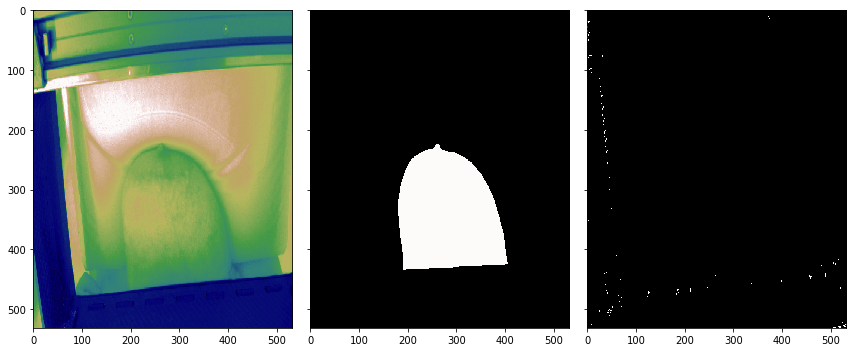

In [41]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 5))
ax[0].imshow(x_test[0, :, :, 0], aspect="auto")
ax[1].imshow(y_test, aspect="auto")
pred = prediction[0, :, :, 1] > 0.0835
# pred = np.int8(np.rint(pred))
ax[2].imshow(pred, aspect="auto")
# ax[3].imshow(prediction[0,...,1] > 0.07, aspect="auto")
# ax[4].imshow(prediction[0,...,1] > 0.075, aspect="auto")
# ax[5].imshow(prediction[0,...,1] > 0.08, aspect="auto")
fig.tight_layout()
plt.show()

In [21]:
print(prediction[0, :, :, 1])
print(np.min(prediction[0, :, :, 1]))
print(np.max(prediction[0, :, :, 1]))

[[0.08298357 0.0829801  0.08291879 ... 0.08302767 0.08309139 0.08308022]
 [0.08303951 0.08307602 0.08292866 ... 0.08311515 0.08297757 0.08313472]
 [0.08306803 0.08313404 0.08297642 ... 0.0831416  0.08295994 0.08306862]
 ...
 [0.08302753 0.08311453 0.08297432 ... 0.12704575 0.07905739 0.07525472]
 [0.08307541 0.08314396 0.0829616  ... 0.07250182 0.07350463 0.0721916 ]
 [0.08288469 0.08306191 0.08307638 ... 0.07955039 0.07916483 0.07550228]]
0.069799446
0.25438404
